<a href="https://colab.research.google.com/github/Shashankk15/22BDS0346_EDA/blob/main/22BDS0346.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BUDDA SHASHANK
## 22BDS0346
## EDA PROJECT

In [ ]:
# 1. Install and Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
# 2. Load Dataset
df = pd.read_csv('/content/data.csv')


In [ ]:
#3. Basic Exploration ---
print("Dataset Dimensions:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nFirst 5 Rows:\n", df.head())

Dataset Dimensions: (240, 7)

Data Types:
 Temperature (K)             int64
Luminosity(L/Lo)           object
Radius(R/Ro)              float64
Absolute magnitude(Mv)    float64
Star type                   int64
Star color                 object
Spectral Class             object
dtype: object

First 5 Rows:
    Temperature (K) Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068           0.0024        0.1700                   16.12   
1             3042           0.0005        0.1542                   16.60   
2             2600           0.0003        0.1020                   18.70   
3             2800           0.0002        0.1600                   16.65   
4             1939         0.000138        0.1030                   20.06   

   Star type Star color Spectral Class  
0          0        Red              M  
1          0        Red              M  
2          0        Red              M  
3          0        Red              M  
4          0        R

In [ ]:
#4. Summary Statistics
print("\nSummary Statistics (Numeric):\n", df.describe())
print("\nSummary Statistics (All):\n", df.describe(include='all'))


Summary Statistics (Numeric):
        Temperature (K)  Radius(R/Ro)  Absolute magnitude(Mv)   Star type
count       240.000000    240.000000              240.000000  240.000000
mean      10497.462500    237.157781                4.382396    2.500000
std        9552.425037    517.155763               10.532512    1.711394
min        1939.000000      0.008400              -11.920000    0.000000
25%        3344.250000      0.102750               -6.232500    1.000000
50%        5776.000000      0.762500                8.313000    2.500000
75%       15055.500000     42.750000               13.697500    4.000000
max       40000.000000   1948.500000               20.060000    5.000000

Summary Statistics (All):
         Temperature (K) Luminosity(L/Lo)  Radius(R/Ro)  \
count        240.000000              240    240.000000   
unique              NaN              208           NaN   
top                 NaN           200000           NaN   
freq                NaN                5           

In [ ]:
# 5. Missing Values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                3
Spectral Class            0
dtype: int64


In [ ]:
# 6. Data Cleaning
# Convert Luminosity to numeric
df['Luminosity(L/Lo)'] = pd.to_numeric(df['Luminosity(L/Lo)'], errors='coerce')

In [ ]:
# Handle missing 'Star color'
df['Star color'] = df['Star color'].fillna('Unknown')

In [ ]:
# Standardize string columns
df['Star color'] = df['Star color'].str.strip().str.title()
df['Spectral Class'] = df['Spectral Class'].str.strip().str.upper()


In [ ]:
print("\nCleaned Data Sample:\n", df.head())


Cleaned Data Sample:
    Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068          0.002400        0.1700                   16.12   
1             3042          0.000500        0.1542                   16.60   
2             2600          0.000300        0.1020                   18.70   
3             2800          0.000200        0.1600                   16.65   
4             1939          0.000138        0.1030                   20.06   

   Star type Star color Spectral Class  
0          0        Red              M  
1          0        Red              M  
2          0        Red              M  
3          0        Red              M  
4          0        Red              M  


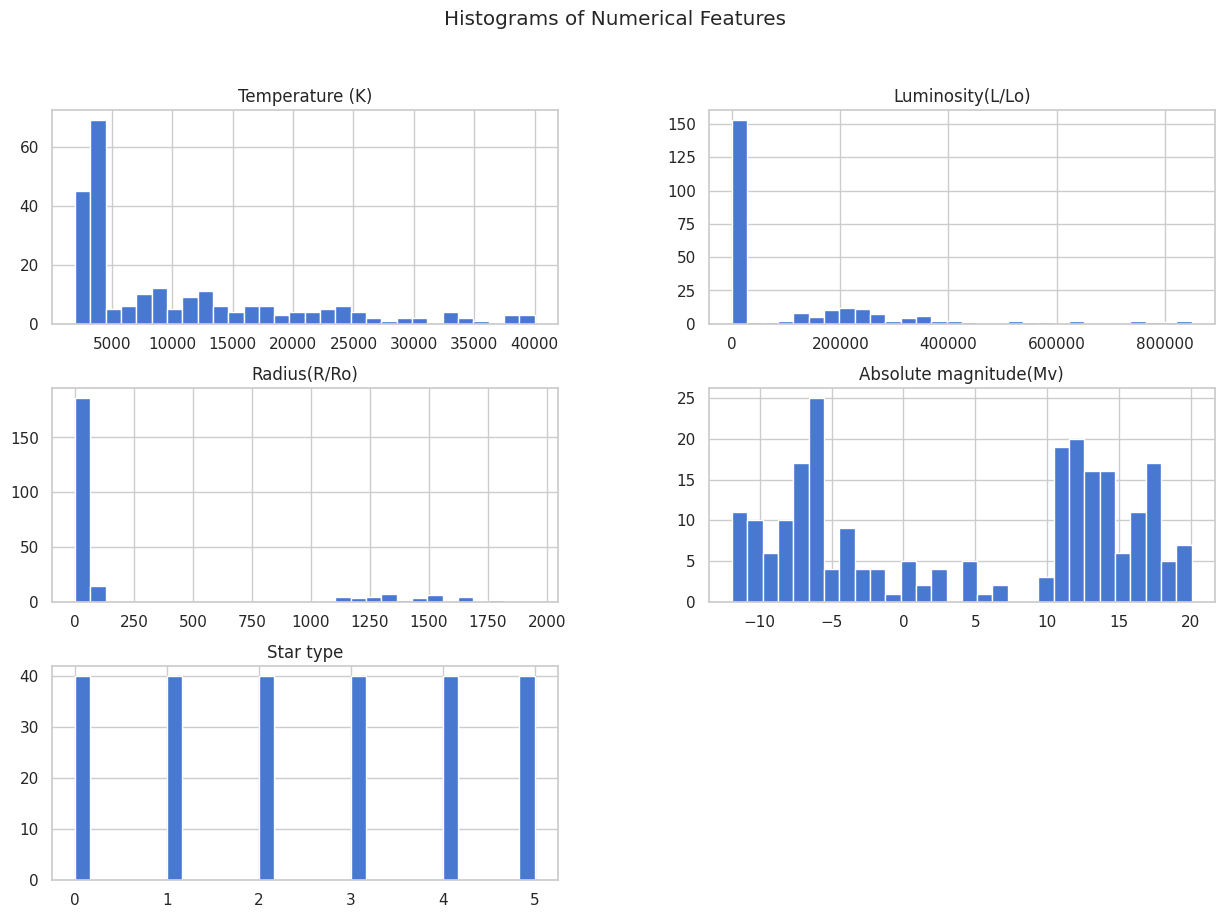

In [ ]:
# 7. Univariate Analysis
# Histograms for numeric columns
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features")
plt.show()

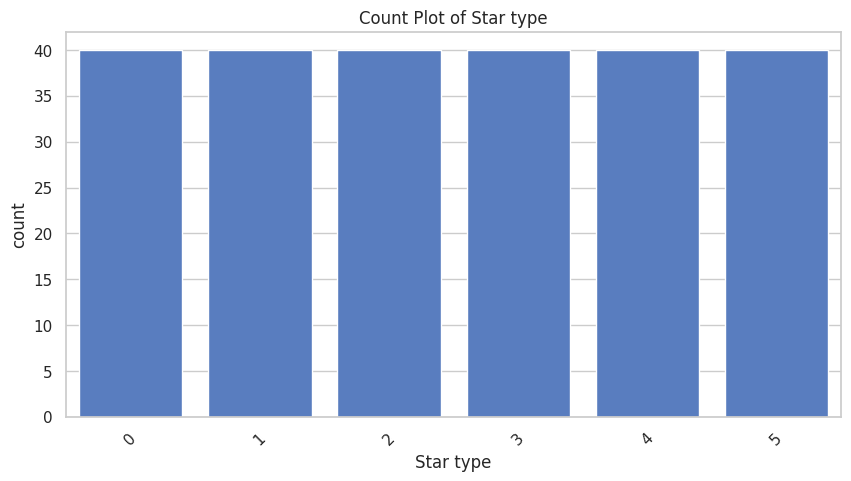

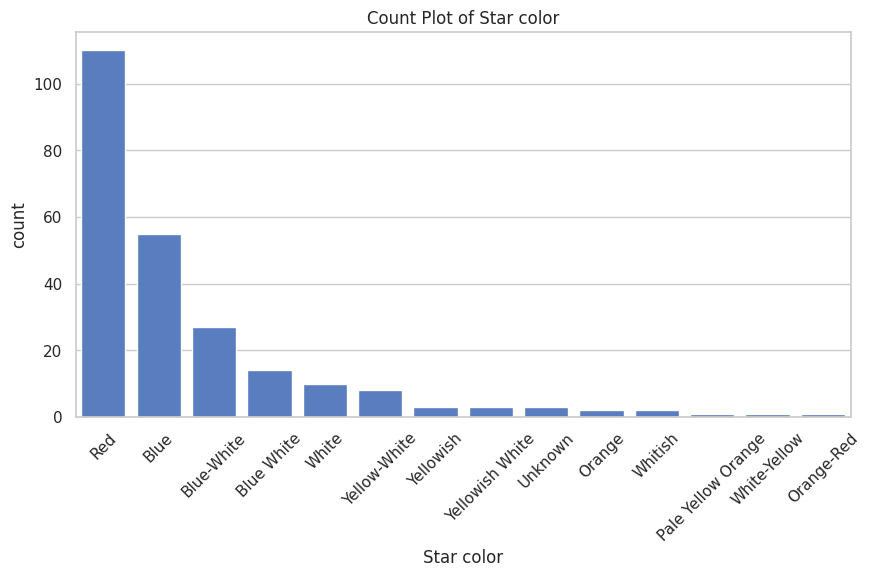

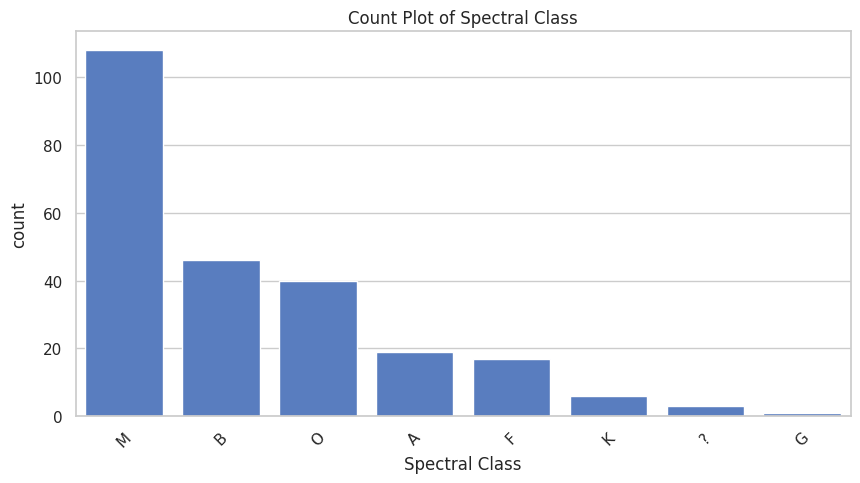

In [ ]:
# Countplots for categorical columns
for col in ['Star type', 'Star color', 'Spectral Class']:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()

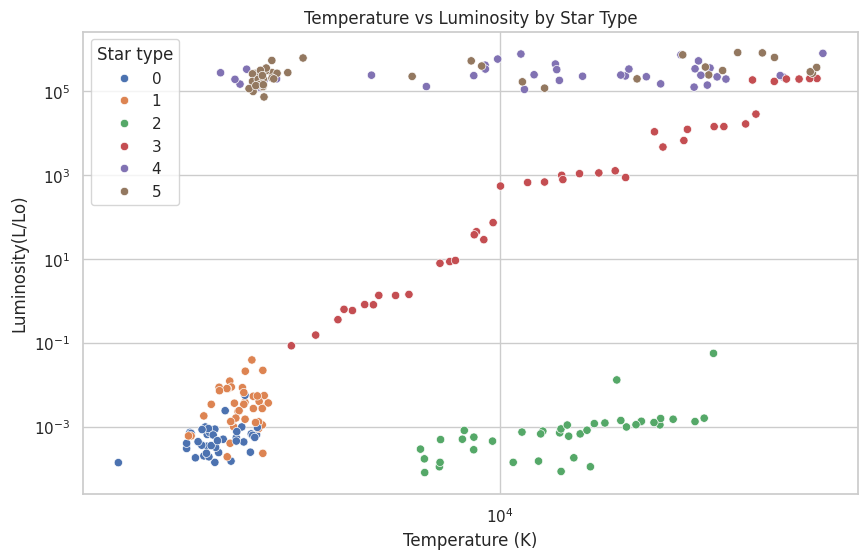

In [ ]:
# 8. Bivariate Analysis
# Example: Temperature vs Luminosity
plt.figure()
sns.scatterplot(data=df, x='Temperature (K)', y='Luminosity(L/Lo)', hue='Star type', palette='deep')
plt.title("Temperature vs Luminosity by Star Type")
plt.xscale('log')
plt.yscale('log')
plt.show()

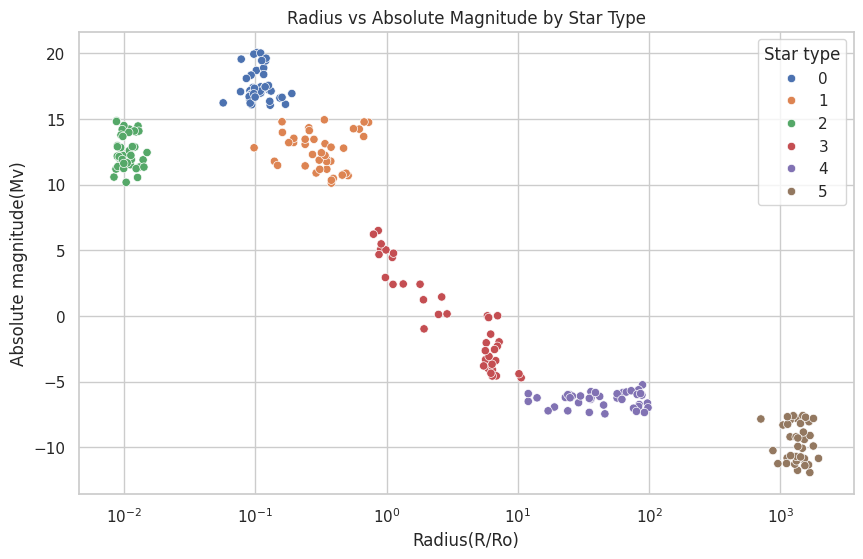

In [ ]:
# Example: Radius vs Absolute Magnitude
plt.figure()
sns.scatterplot(data=df, x='Radius(R/Ro)', y='Absolute magnitude(Mv)', hue='Star type', palette='deep')
plt.title("Radius vs Absolute Magnitude by Star Type")
plt.xscale('log')
plt.show()

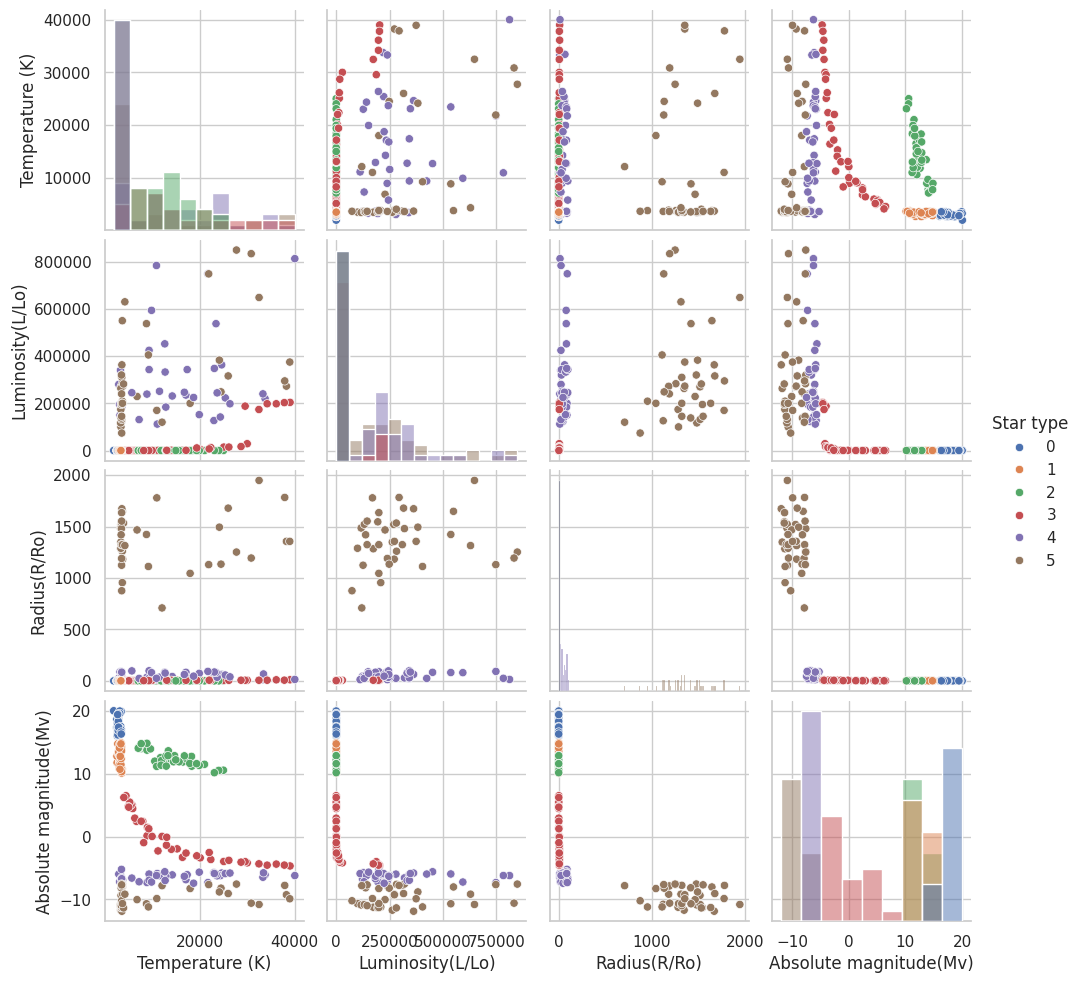

In [ ]:
# 9. Multivariate Analysis
# Pairplot
sns.pairplot(df, vars=['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)'],
             hue='Star type', diag_kind='hist', palette='deep')
plt.show()

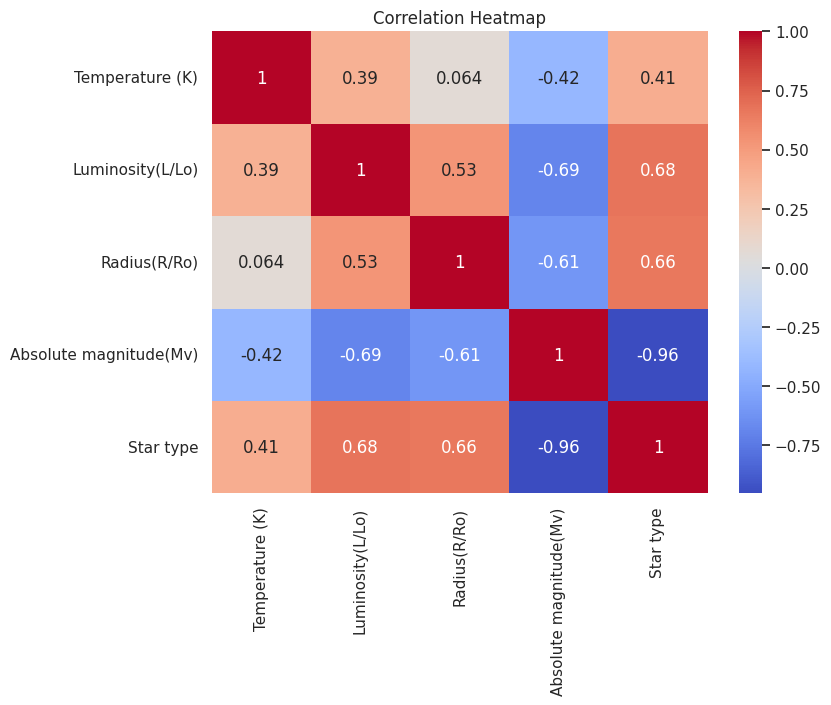

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()